# EJEMPLO MACHINE LEARNING UTILIZANDO KNEIGHBORS


In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#Separo etiquetas (y) y el resto de las features (x)

data = pd.read_csv(r"C:\Users\jpans\Desktop\CURSO DATA SCIENCE\UTN\Notebooks de clases\clase04\clusterai_2021_clase04_dataset_breast_wisconsin.csv", sep=";", index_col= 0)
data_y = data.loc[:,"diagnosis"]
x = data.iloc[:, 1:]


In [4]:
from sklearn import preprocessing
# "le" es el label encoder que transforma las etiquetas de string a INT.
le = preprocessing.LabelEncoder()
y= le.fit_transform(data_y)

# sobre-escribo el vector "y" con las etiquetas numericas obtenidas del label encoder


In [5]:
# obtenemos xtrain, xtest, ytrain e ytest :
# OJO! en este caso estamos usando 90% de test para hacerla mas dificil
# en general el test set es entre 20 y 30% 
#Random_state es para que siempre me de igual cuando lo repita. 

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=4)


In [6]:
# auto scaling train- set (mean = 0, std = 1)
# ver que en la misma linea creamos el standard scaler y lo "fiteamos" al mismo tiempo con "xtrain"

scaler = preprocessing.StandardScaler().fit(xtrain)
scaler


StandardScaler()

In [7]:
# xtrain_scal tendra el dataset de train pre-procesado con el standard scaler

xtrain_scal = scaler.transform(xtrain)

# para cada feature imprimimos la media y el desvio standard obtenido. Ver que media = 0 y stdev = 1.
print(xtrain_scal.mean(axis=0))
print(xtrain_scal.std(axis=0))

[ 2.69381587e-16  4.52873392e-16 -6.44173359e-16 -9.76020241e-17
 -1.15170388e-15  3.44535145e-16 -6.83214169e-17  1.85443846e-16
  8.31569246e-16  2.45957101e-16 -1.00530085e-16 -1.95204048e-16
 -3.25990761e-16  4.09928501e-17  9.36979432e-17  9.56499837e-17
 -6.83214169e-17  6.44173359e-17  5.07530526e-17  1.32738753e-16
 -3.20134639e-16  3.66983611e-16 -1.56163239e-17  7.80816193e-17
 -2.69381587e-16 -1.60067320e-16 -8.58897812e-17 -6.63693764e-17
 -5.52427457e-16 -5.69019801e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
# utilizando el scaler "fiteado" o "ajustado" a los datos de train, aplicamos el scaler a los datos de test.
# obtenemos "xtest_scal" 

xtest_scal = scaler.transform(xtest)

# obviamente la media y stdev de las features en test no seran 0 y 1 ya que el scaler se ajusto con train unicamente.
print(xtest_scal.mean(axis=0))
print(xtest_scal.std(axis=0))

[-0.01009377  0.01643724 -0.0106703  -0.0008516  -0.14141183  0.00557541
 -0.03366727 -0.05907177 -0.08024198  0.00427363 -0.03037773 -0.05337277
 -0.02862705 -0.02065425 -0.11681667  0.08285973  0.00805485 -0.00854957
 -0.05121709  0.02718135 -0.00040182 -0.04522756  0.00903284  0.01119
 -0.11745094  0.07391829  0.00025154 -0.00590219 -0.07852752  0.06767441]
[1.02378476 0.96003396 1.01578259 1.02506384 1.297053   1.02239174
 1.00942282 0.97161937 1.11010427 1.11691469 0.92188787 1.07542425
 0.90044813 0.81177991 0.78812224 1.00169501 1.14796413 1.02697272
 0.94644343 0.76938509 1.06263954 0.89930582 1.07007673 1.05912347
 1.15283454 1.05992419 1.03799148 1.04011855 0.99048446 1.03157885]


Text(0.5, 1.0, 'Test data')

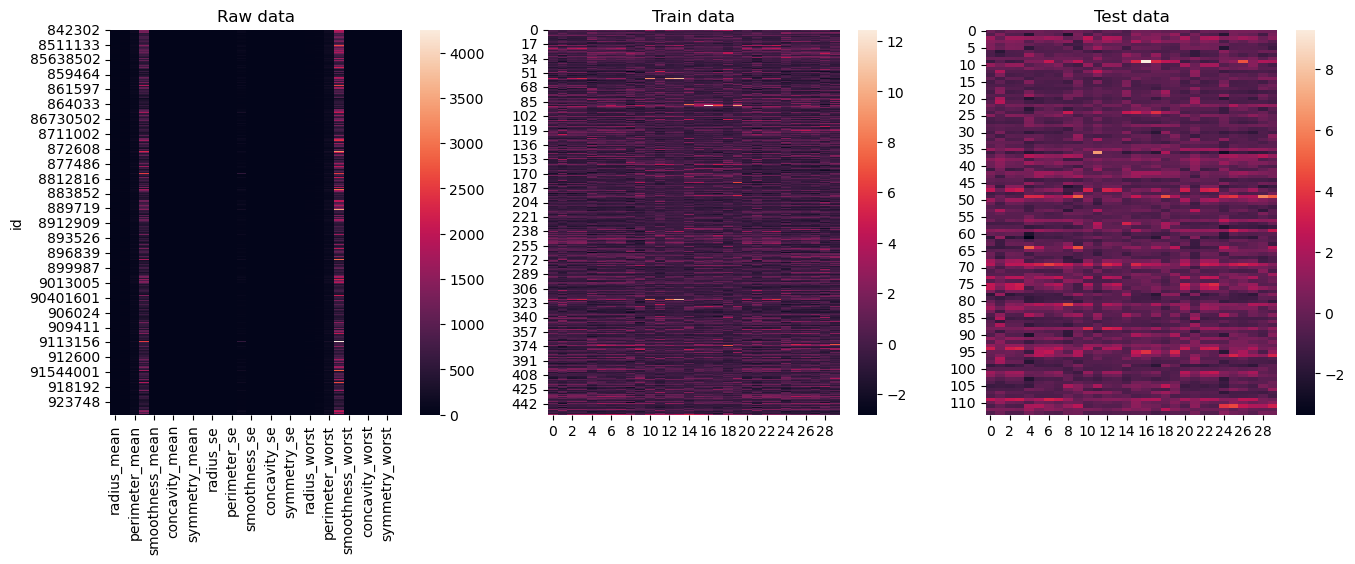

In [9]:
#COmparacion de como al escalar los datos se logra homgenizar las magnitudes y esto se observa en el heatmap

fig, axs = plt.subplots(1, 3, figsize=(16,5))
sns.heatmap(x, ax = axs[0])
sns.heatmap(xtrain_scal, ax = axs[1])
sns.heatmap(xtest_scal, ax = axs[2])
axs[0].set_title('Raw data')
axs[1].set_title('Train data')
axs[2].set_title('Test data')

In [10]:
#Realizo Grid-search para encontrar mejor hiper-parametro

from sklearn.model_selection import GridSearchCV

parametros ={"n_neighbors": [1,5,10,20,50,75,100]}
knm = KNeighborsClassifier()

clf_knm = GridSearchCV(knm, param_grid= parametros, refit=True, cv=5, verbose=1)

clf_knm.fit(xtrain_scal, ytrain.ravel())


Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 5, 10, 20, 50, 75, 100]},
             verbose=1)

In [11]:
#Me fijo cuales fueron lso scores de las pruebas y observo el mejor hiperparametro fue K = 5

scores = clf_knm.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000601,0.000801,0.062800,0.028128,1,{'n_neighbors': 1},0.956044,0.967033,0.945055,0.890110,0.945055,0.940659,0.026556,5
1,0.000400,0.000490,0.046599,0.001356,5,{'n_neighbors': 5},0.978022,0.978022,0.956044,0.934066,0.956044,0.960440,0.016447,1
2,0.000400,0.000490,0.047200,0.000751,10,{'n_neighbors': 10},0.989011,0.978022,0.956044,0.901099,0.956044,0.956044,0.030295,2
3,0.000400,0.000490,0.047400,0.000490,20,{'n_neighbors': 20},0.967033,0.956044,0.967033,0.901099,0.967033,0.951648,0.025631,3
4,0.000400,0.000490,0.049001,0.001546,50,{'n_neighbors': 50},0.967033,0.945055,0.967033,0.901099,0.934066,0.942857,0.024474,4


In [12]:
print("The best parameters are %s with a score of %0.2f" % (clf_knm.best_params_, clf_knm.best_score_))

The best parameters are {'n_neighbors': 5} with a score of 0.96


In [13]:
#Realizo prediccion sobre muestras del test

y_pred = clf_knm.predict(xtest_scal)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0])

In [14]:
#Calculo accuracy

test_accu = clf_knm.score(xtest_scal, ytest)
print(f"La accuracy es de {str(test_accu)}")  #Es similar al del train

La accuracy es de 0.9649122807017544


In [15]:
#Calcular OMC

yproba = clf_knm.predict_proba(xtest_scal)
fpr1, tpr1, thresholds = roc_curve(ytest.astype('int'), yproba[:,1], drop_intermediate = False)
auc = metrics.auc(fpr1, tpr1)
print("El AUC es = " + str(auc))

El AUC es = 0.9924632352941176


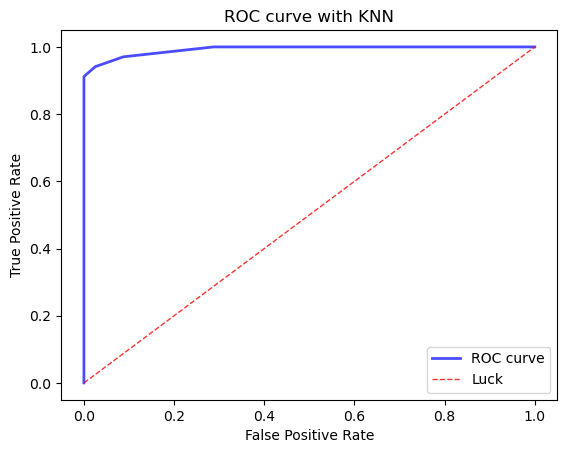

In [16]:
#Grafico curva

plt.plot(fpr1, tpr1, lw=2, alpha=0.7 , label = 'ROC curve', color = 'b')
plt.plot([0, 1], [0, 1], linestyle='--', lw=1, color='r',label='Luck', alpha=.8)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(False)
plt.legend(loc="lower right")
plt.title('ROC curve with KNN')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

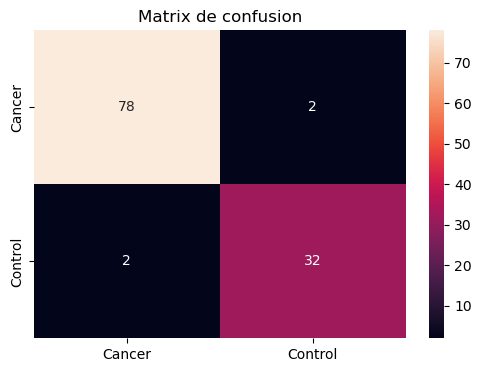

In [24]:
#Matrix de confusion

cm = confusion_matrix(ytest, y_pred)


cm = pd.DataFrame(cm, index=["Cancer", "Control"], columns=["Cancer", "Control"])
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True)
plt.title("Matrix de confusion")
plt.show